<a href="https://colab.research.google.com/github/Radhe-0/Practicas/blob/main/Machine%20Learning/Red_neuronal_5(clasificacion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red neuronal de clasificación usando SKLearn

In [17]:
!git clone https://github.com/Radhe-0/Generadores.git

Cloning into 'Generadores'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 139 (delta 76), reused 38 (delta 18), pack-reused 0
Receiving objects: 100% (139/139), 459.51 KiB | 2.20 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [18]:
%cd Generadores

/content/Generadores/Generadores


In [19]:
# Importamos las librerías

from Generadores import * # Para generar los datos

import pandas as pd # Para los dataframes
import numpy as np # Para las matrices

import seaborn as sns # Para graficar la matriz de confusión
import matplotlib.pyplot as plt # Para graficar los datos

from sklearn.model_selection import train_test_split # Para separar los datos
from sklearn.preprocessing import StandardScaler # Para escalar los datos
from sklearn.neural_network import MLPClassifier # Para la red neuronal
from sklearn.metrics import classification_report # Para conocer la precisión
from sklearn.metrics import confusion_matrix # Para la matriz de confusión

In [20]:
# Carga de los datos

cumulo1 = DatosSVM2(100000,cumulo=1)
df = pd.DataFrame(cumulo1, columns=['X','Y'])

cumulo2 = DatosSVM2(100000,cumulo=4)
df2 = pd.DataFrame(cumulo2, columns=['X','Y'])

df['categoria'] = 0
df2['categoria'] = 1

data = pd.concat([df, df2], axis='rows')
data

,X,Y,categoria
0,-0.000000,0.000000,0
1,-0.000203,-0.000112,0
2,0.000119,0.001905,0
3,0.000903,0.000434,0
4,0.001021,-0.000334,0
...,...,...,...
99995,425.868483,-178.694910,1
99996,693.136343,-96.359243,1
99997,444.784521,8.388306,1
99998,392.520352,8.069407,1


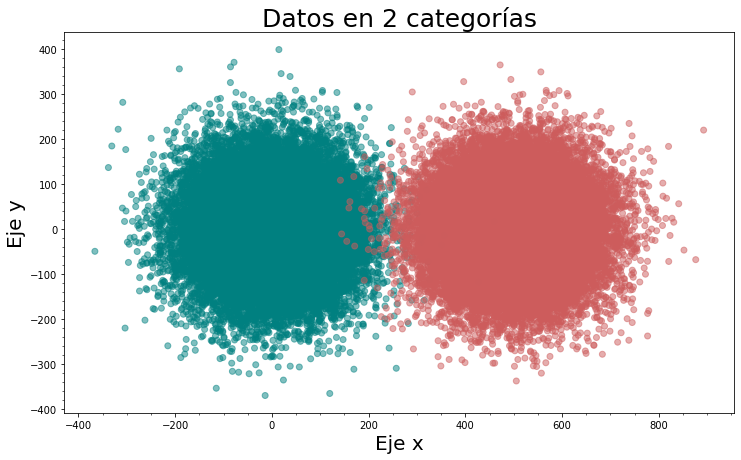

In [21]:
# Visualizamos los datos

colores = {
    0: 'teal',
    1: 'indianred'
}

fig = plt.figure(figsize=(12,7))
ax = plt.subplot()
ax.scatter(data['X'], data['Y'],c=data['categoria'].map(colores),alpha=0.5)
plt.title('Datos en 2 categorías', fontsize=25)
plt.xlabel('Eje x', fontsize=20)
plt.ylabel('Eje y', fontsize=20)
plt.minorticks_on()
plt.show()

In [22]:
# Separo los datos en 2 grupos: Datos de entrenamiento y datos de validación

X = data[['X','Y']]
Y = data['categoria']

xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

In [23]:
# Escalamiento de los datos

scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [24]:
# Creamos el modelo de red neuronal

model = MLPClassifier(
    hidden_layer_sizes=(2,), # Una capa oculta con dos neuronas
    verbose=True
)

# Entrenamos el modelo

model.fit(xtrain,ytrain)

Iteration 1, loss = 1.13665953
Iteration 2, loss = 0.40111598
Iteration 3, loss = 0.20826279
Iteration 4, loss = 0.13788364
Iteration 5, loss = 0.09363840
Iteration 6, loss = 0.06483748
Iteration 7, loss = 0.04573314
Iteration 8, loss = 0.03280031
Iteration 9, loss = 0.02388297
Iteration 10, loss = 0.01765144
Iteration 11, loss = 0.01325671
Iteration 12, loss = 0.01013199
Iteration 13, loss = 0.00789245
Iteration 14, loss = 0.00629285
Iteration 15, loss = 0.00514358
Iteration 16, loss = 0.00431439
Iteration 17, loss = 0.00371842
Iteration 18, loss = 0.00329381
Iteration 19, loss = 0.00298857
Iteration 20, loss = 0.00277058
Iteration 21, loss = 0.00261341
Iteration 22, loss = 0.00250222
Iteration 23, loss = 0.00241742
Iteration 24, loss = 0.00235588
Iteration 25, loss = 0.00230847
Iteration 26, loss = 0.00226776
Iteration 27, loss = 0.00224024
Iteration 28, loss = 0.00221739
Iteration 29, loss = 0.00219454
Iteration 30, loss = 0.00217622
Iteration 31, loss = 0.00216490
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(2,), verbose=True)

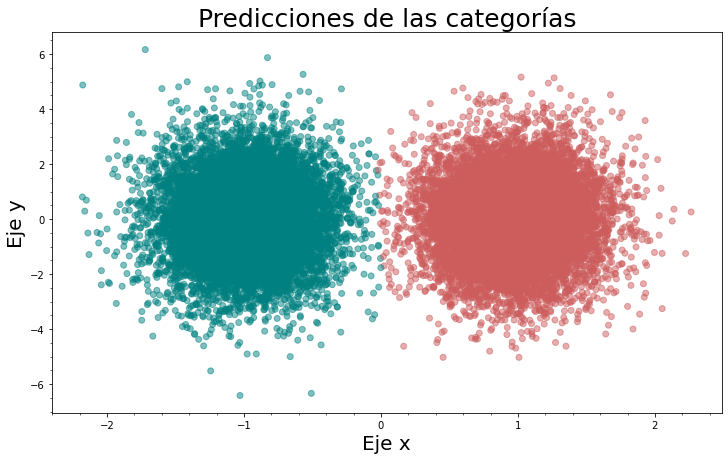

In [25]:
# Realizo predicciones con los datos de validacion

predicciones = model.predict(xtest)

# Grafico las predicciones

xtestdf = pd.DataFrame(xtest, columns=['X','Y'])
xtestdf['categoria'] = predicciones

fig = plt.figure(figsize=(12,7))
plt.scatter(xtestdf['X'], xtestdf['Y'],c=xtestdf['categoria'].map(colores),alpha=0.5)
plt.title('Predicciones de las categorías', fontsize=25)
plt.xlabel('Eje x', fontsize=20)
plt.ylabel('Eje y', fontsize=20)
plt.minorticks_on()
plt.show()

In [26]:
# Precisión del modelo

model.score(xtest,ytest)

0.99924

**La precisión es del 99%**

In [27]:
# Pesos de las capas

model.coefs_

[array([[ 4.09144156e+00, -4.53065073e-02],
        [ 2.88091642e-02, -1.98265574e-05]]), array([[3.93727029],
        [0.37614202]])]

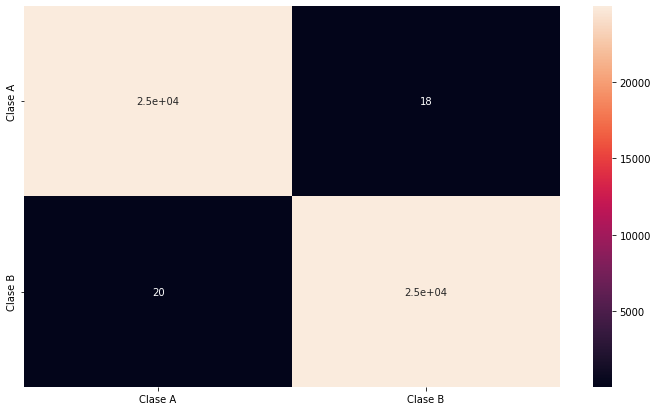

In [28]:
# Matriz de confusión

MXC = confusion_matrix(ytest,predicciones)
index_columns = ['Clase A', 'Clase B']
df_MXC = pd.DataFrame(MXC, index=index_columns, columns=index_columns)


fig = plt.figure(figsize=(12,7))
sns.heatmap(df_MXC,cmap='rocket', annot=True)
plt.show()